# MTG: Creature Power-Creep

## Data Cleaning

Converting the json file downloaded from scryfall to csv:

In [2]:
import pandas as pd

df = pd.read_json ("scryfall-default-cards.json", encoding = "utf-8")

The character '—' is causing problems, we will replace it:

In [3]:
df["type_line"] = df["type_line"].str.replace(' —', ':')

In [4]:
#df.to_csv("cards.csv", index = None)

Opening and quickly inspecting the csv

In [5]:
#df = pd.read_csv("cards.csv")
df.head()

,object,id,oracle_id,multiverse_ids,name,printed_name,lang,released_at,uri,scryfall_uri,...,watermark,color_indicator,loyalty,promo_types,mtgo_id,life_modifier,hand_modifier,arena_id,variation_of,mtgo_foil_id
0,card,02efd6cf-1ed0-44b3-b3b9-94a45696e1f3,09aeea91-b1dc-443f-a509-4758f052c0a7,[],Voltaic Key,通電式キー,ja,2020-03-26,https://api.scryfall.com/cards/02efd6cf-1ed0-4...,https://scryfall.com/card/pmei/35/ja/%E9%80%9A...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,94355044-e67a-4605-a37b-e879784fc9e5,9d3c7c96-056f-408e-a834-fa45a430d3d4,[],"Daxos, Blessed by the Sun",太陽に祝福されしダクソス,ja,2020-03-01,https://api.scryfall.com/cards/94355044-e67a-4...,https://scryfall.com/card/pmei/36/ja/%E5%A4%AA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,e8fb396f-3ae1-4705-bf94-3e1b0556e910,3c304eaa-09e9-4439-b35d-4b05a54c2fa7,[],Acorn Stash,NaN,en,2020-02-29,https://api.scryfall.com/cards/e8fb396f-3ae1-4...,https://scryfall.com/card/tund/6/acorn-stash?u...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,628c542b-7579-4070-9143-6f1f7221468f,d82528ac-88f7-4c38-9b1c-c33e6faea532,[],Giant Teddy Bear,NaN,en,2020-02-29,https://api.scryfall.com/cards/628c542b-7579-4...,https://scryfall.com/card/tund/5/giant-teddy-b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,6819b8c9-73a3-4e8e-ad7a-95cffabf873a,eaf318f0-2cad-437c-8162-78462ecbc235,[],Dragon,NaN,en,2020-02-29,https://api.scryfall.com/cards/6819b8c9-73a3-4...,https://scryfall.com/card/tund/4/dragon?utm_so...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(51230, 71)

In [7]:
df.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'name', 'printed_name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_uris', 'mana_cost', 'cmc', 'type_line', 'printed_type_line',
       'oracle_text', 'printed_text', 'colors', 'color_identity', 'legalities',
       'games', 'reserved', 'foil', 'nonfoil', 'oversized', 'promo', 'reprint',
       'variation', 'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'card_back_id', 'artist',
       'artist_ids', 'illustration_id', 'border_color', 'frame', 'full_art',
       'textless', 'booster', 'story_spotlight', 'edhrec_rank', 'related_uris',
       'power', 'toughness', 'frame_effects', 'all_parts', 'tcgplayer_id',
       'preview', 'flavor_text', 'card_faces', 'watermark', 'color_indicator',
       'loyalty', 'promo_types', 'mtgo_id', 'life_modifier', 'hand_modifier',
 

### Narrowing down to english cards

In [8]:
english_cards = df[df["lang"] == "en"]
english_cards.shape

(49223, 71)

### Narrowing down to core set cards

In [9]:
english_cards["set_type"].unique()

array(['token', 'funny', 'promo', 'expansion', 'memorabilia', 'box',
       'commander', 'core', 'spellbook', 'draft_innovation',
       'masterpiece', 'planechase', 'masters', 'treasure_chest',
       'starter', 'duel_deck', 'from_the_vault', 'archenemy',
       'premium_deck', 'vanguard'], dtype=object)

In [10]:
english_core_cards = english_cards[english_cards["set_type"] == "core"]
english_core_cards.shape

(6743, 71)

Checking that we indeed have the complete core sets and that all the cards we select make sense for our analysis

In [11]:
english_core_cards["set"].unique()

array(['m20', 'm19', 'ori', 'm15', 'm14', 'm13', 'm12', 'm11', 'm10',
       '10e', '9ed', '8ed', '7ed', '6ed', '5ed', '4ed', 'sum', '3ed',
       '2ed', 'leb', 'lea'], dtype=object)

In [12]:
m20 = english_core_cards[english_core_cards["set"] == "m20"]
m20.shape

(345, 71)

After checking on scryfall.com, we realise that, for the example of M20, we do have all the cards.
However, we also have some non-draftable cards, like the Buy-a-box promo or cards for planeswalker decks.
For our analysis, it would be best to remove these non-booster cards, as they tend to be different and will not make for a fair comparison with older sets not having these subsets.
We will now proceed to only keep in-booster cards:

In [13]:
english_core_cards["booster"].unique()

array([False,  True])

In [14]:
english_draftable_core_cards = english_core_cards[english_core_cards["booster"] == True]
english_draftable_core_cards[english_draftable_core_cards["set"] == "m20"].shape

(280, 71)

There is indeed 280 draftable cards in M20, our operation succeeded.

### Narrowing down to creatures

In [15]:
english_draftable_core_cards["type_line"].unique()

array(['Basic Land: Forest', 'Basic Land: Mountain', 'Basic Land: Swamp',
       'Basic Land: Island', 'Basic Land: Plains', 'Land', 'Artifact',
       'Artifact Creature: Golem', 'Artifact Creature: Construct',
       'Artifact Creature: Scarecrow', 'Artifact: Equipment',
       'Legendary Artifact Creature: Scout', 'Artifact Creature: Knight',
       'Artifact Creature: Bird', 'Legendary Creature: Elemental Horror',
       'Creature: Zombie Wizard', 'Creature: Human Knight',
       'Creature: Elemental', 'Legendary Creature: Elemental',
       'Creature: Ogre Berserker', 'Enchantment',
       'Creature: Elemental Wizard', 'Legendary Creature: Bird Wizard',
       'Legendary Creature: Elf Advisor',
       'Legendary Creature: Human Cleric', 'Creature: Treefolk Soldier',
       'Creature: Bird Spirit', 'Creature: Zombie Knight',
       'Creature: Elf Scout', 'Enchantment: Aura',
       'Creature: Elemental Horror', 'Creature: Hydra',
       'Legendary Planeswalker: Vivien', 'Instant', 

We will only keep rows where the type_line contains "Creature"

In [16]:
english_draftable_core_creatures = english_draftable_core_cards[english_draftable_core_cards["type_line"].str.contains("Creature")]
english_draftable_core_creatures.shape

(2801, 71)

In [17]:
(english_draftable_core_creatures["set"] == "m20").sum()

141

There is indeed 141 draftable creatures in M20.

### Narrowing note
We started with 51 230 cards and we now only work with 2 801, which is about 5.47% of the starting rows.

### Excluding unnecessary columns

In [18]:
relevant_columns = ["id", "name", "mana_cost", "cmc", "type_line", "colors", "set", "set_name", "rarity", "power", "toughness", "released_at"]
# We only take the selected columns, copy the data, and reset the index without keeping the old one
selected_creatures = english_draftable_core_creatures[relevant_columns].copy().reset_index(drop = True)

In [19]:
selected_creatures.head()

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at
0,1b4de70a-729b-4566-b6f3-c76f551405a5,Stone Golem,{5},5.0,Artifact Creature: Golem,[],m20,Core Set 2020,common,4,4,2019-07-12
1,6ed61426-e652-4b48-b936-8be9b6b57731,Steel Overseer,{2},2.0,Artifact Creature: Construct,[],m20,Core Set 2020,rare,1,1,2019-07-12
2,39f2d2e8-a9ed-42cc-9a8a-fc697a7251e5,Scuttlemutt,{3},3.0,Artifact Creature: Scarecrow,[],m20,Core Set 2020,uncommon,2,2,2019-07-12
3,8dd2ebbe-71c6-405b-bad0-5680f0ff575c,Salvager of Ruin,{3},3.0,Artifact Creature: Construct,[],m20,Core Set 2020,uncommon,2,1,2019-07-12
4,5c9fdb01-ba52-4510-897e-0d69558fdaee,Prismite,{2},2.0,Artifact Creature: Golem,[],m20,Core Set 2020,common,2,1,2019-07-12


In [20]:
# We will use 'sc' as a shorthand to make lines shorter
sc = selected_creatures

### Cleaning column data

In [21]:
sc.dtypes

id                     object
name                   object
mana_cost              object
cmc                   float64
type_line              object
colors                 object
set                    object
set_name               object
rarity                 object
power                  object
toughness              object
released_at    datetime64[ns]
dtype: object

We would like to convert to int the cmc, power and toughness columns.
We will proceed to examine their unique values to see if we can.

#### 'cmc' column

In [22]:
sc["cmc"].unique()

array([ 5.,  2.,  3.,  4.,  7.,  6.,  1.,  8.,  0.,  9., 11.])

In [23]:
sc["cmc"] = sc["cmc"].astype(int)

#### 'power' and 'toughness' columns

In [24]:
sc["power"].unique()

array(['4', '1', '2', '3', '*', '5', '7', '0', '8', '6', nan, '10', '9',
       '11', '2+*'], dtype=object)

In [25]:
sc["toughness"].unique()

array(['4', '1', '2', '3', '5', '7', '6', '8', '0', nan, '10', '*', '9',
       '11', '1+*', '7-*', '2+*'], dtype=object)

We note that there are non-numeric values, '*', '+' and 'nan'. The first two indicate a dynamic value. The 'nan' is concerning.
We will now inspect them closely to see if we can approximate their value to a int, or need to drop them:

In [26]:
# creatures that have '*' in their power and/or toughness
peculiar_creatures = sc[(sc["power"].str.contains('\*')) | (sc["toughness"].str.contains('\*'))]
peculiar_creatures

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at
20,edec85ce-7daa-48c2-b25d-b22941e01e73,Ironroot Warlord,{1}{G}{W},3,Creature: Treefolk Soldier,"[G, W]",m20,Core Set 2020,uncommon,*,5,2019-07-12
156,6e0def77-3528-40fb-a6b2-c3d1e31ade65,Enigma Drake,{1}{U}{R},3,Creature: Drake,"[R, U]",m19,Core Set 2019,uncommon,*,4,2018-07-13
292,eb12b1d8-c53e-4d48-89e5-2168ff34a853,Zendikar Incarnate,{2}{R}{G},4,Creature: Elemental,"[G, R]",ori,Magic Origins,uncommon,*,4,2015-07-17
354,c7c6dbe5-3375-42c2-88f5-8ead0dc2b094,Revenant,{4}{B},5,Creature: Spirit,[B],ori,Magic Origins,uncommon,*,*,2015-07-17
446,dabe0865-5420-463e-9138-ccd805be8b31,Kalonian Twingrove,{5}{G},6,Creature: Treefolk Warrior,[G],m15,Magic 2015,rare,*,*,2014-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2674,fc78dced-27d2-441a-b63b-32356bc33747,Nightmare,{5}{B},6,Creature: Nightmare Horse,[B],leb,Limited Edition Beta,rare,*,*,1993-10-04
2727,e2b15221-c8b0-4861-9f8b-8a65834ad499,Gaea's Liege,{3}{G}{G}{G},6,Creature: Avatar,[G],lea,Limited Edition Alpha,rare,*,*,1993-08-05
2745,8fe3fd83-969c-4add-888f-86f4306b067c,Keldon Warlord,{2}{R}{R},4,Creature: Human Barbarian,[R],lea,Limited Edition Alpha,uncommon,*,*,1993-08-05
2765,b3724e40-0622-4aee-9334-6c9fff88bcd5,Plague Rats,{2}{B},3,Creature: Rat,[B],lea,Limited Edition Alpha,common,*,*,1993-08-05


In [27]:
peculiar_creatures["set"].value_counts()

5ed    8
4ed    7
10e    7
9ed    6
7ed    6
8ed    5
3ed    5
sum    5
lea    4
6ed    4
2ed    4
leb    4
m13    3
m12    2
m10    2
m15    2
ori    2
m14    1
m19    1
m20    1
Name: set, dtype: int64

There are 79 creatures that have a dynamic power and/or toughness. There are too many to estimate one by one, we will drop them. They are not concentrated on a few sets, so it will not impact the analysis in a significant way.
It represents 79/2801 = 2.82% of the rows.
We drop them:

In [28]:
sc.drop(peculiar_creatures.index, inplace = True)
sc.shape

(2722, 12)

In [29]:
# creatures that have a np.nan power and/or toughness
nan_stat_creatures = sc[(sc["power"].isnull()) | (sc["toughness"].isnull())]
nan_stat_creatures

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at
155,7b215968-93a6-4278-ac61-4e3e8c3c3943,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",NaN,4,Legendary Creature: Elder Dragon // Legendary ...,NaN,m19,Core Set 2019,mythic,NaN,NaN,2018-07-13
315,ff0063da-ab6b-499d-8e87-8b34d46f0372,"Nissa, Vastwood Seer // Nissa, Sage Animist",NaN,3,Legendary Creature: Elf Scout // Legendary Pla...,NaN,ori,Magic Origins,mythic,NaN,NaN,2015-07-17
344,b0d6caf0-4fa8-4ec5-b7f4-1307474d1b13,"Chandra, Fire of Kaladesh // Chandra, Roaring ...",NaN,3,Legendary Creature: Human Shaman // Legendary ...,NaN,ori,Magic Origins,mythic,NaN,NaN,2015-07-17
360,9f25e1cf-eeb4-458d-8fb2-b3a2f86bdd54,"Liliana, Heretical Healer // Liliana, Defiant ...",NaN,3,Legendary Creature: Human Cleric // Legendary ...,NaN,ori,Magic Origins,mythic,NaN,NaN,2015-07-17
388,02d6d693-f1f3-4317-bcc0-c21fa8490d38,"Jace, Vryn's Prodigy // Jace, Telepath Unbound",NaN,2,Legendary Creature: Human Wizard // Legendary ...,NaN,ori,Magic Origins,mythic,NaN,NaN,2015-07-17
405,58c39df6-b237-40d1-bdcb-2fe5d05392a9,"Kytheon, Hero of Akros // Gideon, Battle-Forged",NaN,1,Legendary Creature: Human Soldier // Legendary...,NaN,ori,Magic Origins,mythic,NaN,NaN,2015-07-17


These 6 creatures are double-faced cards, with one side being a creature, and the other a planeswalker.

In [30]:
# we like in the non-narrowed df to see if we can find the power and toughness for these creatures
df[df["name"].str.contains("Nicol Bolas, the Ravager")][relevant_columns]

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at
7035,6ab66344-4959-4c7b-8828-b1a89b274e0b,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",NaN,4.0,Legendary Creature: Elder Dragon // Legendary ...,NaN,pm19,Core Set 2019 Promos,mythic,NaN,NaN,2018-07-13
7233,7b215968-93a6-4278-ac61-4e3e8c3c3943,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",NaN,4.0,Legendary Creature: Elder Dragon // Legendary ...,NaN,m19,Core Set 2019,mythic,NaN,NaN,2018-07-13


It looks like that the complete list of cards contains 2 cards for each double-faced cards, but none have power or touhness values.
We will drop these rows:

In [31]:
sc.drop(nan_stat_creatures.index, inplace = True)
sc.shape

(2716, 12)

Now we can convert the 'power' and 'toughness' columns:

In [32]:
sc["power"] = sc["power"].astype(int)
sc["toughness"] = sc["toughness"].astype(int)
sc.dtypes

id                     object
name                   object
mana_cost              object
cmc                     int32
type_line              object
colors                 object
set                    object
set_name               object
rarity                 object
power                   int32
toughness               int32
released_at    datetime64[ns]
dtype: object

### Checking for other NaN values

In [33]:
sc.isnull().sum()

id             0
name           0
mana_cost      0
cmc            0
type_line      0
colors         0
set            0
set_name       0
rarity         0
power          0
toughness      0
released_at    0
dtype: int64

There are no NaN values left.

### Checking for outliers or unexploitable values

In [34]:
# power value distribution in %
sc["power"].value_counts(normalize = True).sort_index() * 100

0      7.695140
1     25.478645
2     32.069219
3     13.991163
4      9.020619
5      5.559647
6      3.534610
7      1.472754
8      0.773196
9      0.220913
10     0.110457
11     0.073638
Name: power, dtype: float64

In [35]:
# toughness value distribution in %
sc["toughness"].value_counts(normalize = True).sort_index() * 100

0      1.325479
1     27.172312
2     25.147275
3     18.372607
4     12.665685
5      7.511046
6      4.344624
7      1.951399
8      1.030928
9      0.294551
10     0.110457
11     0.073638
Name: toughness, dtype: float64

We note that 1.33% of creatures have a toughness of 0, which we should investigate (as a creature with 0 power dies instantly)

In [36]:
no_toughness = sc[sc["toughness"] == 0]
no_toughness.shape

(36, 12)

In [37]:
no_toughness.head()

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at
87,77972745-8689-4733-9a9d-39ae9d6273a2,Embodiment of Agonies,{1}{B}{B},3,Creature: Demon,[B],m20,Core Set 2020,rare,0,0,2019-07-12
171,84127b83-e75a-4f12-92ca-46f50bb89699,Hungering Hydra,{X}{G},1,Creature: Hydra,[G],m19,Core Set 2019,rare,0,0,2018-07-13
248,5b3ffc69-f21b-410e-8993-8c1b4669fc19,Mirror Image,{2}{U},3,Creature: Shapeshifter,[U],m19,Core Set 2019,uncommon,0,0,2018-07-13
286,791c21fb-fc78-4106-9a42-abc73f41ab8b,Hangarback Walker,{X}{X},0,Artifact Creature: Construct,[],ori,Magic Origins,rare,0,0,2015-07-17
433,4f8dc77e-f003-4c25-8394-cda22e3ea039,Undergrowth Scavenger,{3}{G},4,Creature: Fungus Horror,[G],m15,Magic 2015,common,0,0,2014-07-18


These creatures all have a variable power and/or toughness. We can't exploit them for our analysis, so we will drop them. They represent only 1.33% of our rows.

In [38]:
sc.drop(no_toughness.index, inplace = True)
sc.shape

(2680, 12)

In [39]:
no_power = sc[sc["power"] == 0]
no_power.shape

(173, 12)

In [40]:
no_power["type_line"].unique()

array(['Creature: Hydra', 'Creature: Elemental Druid', 'Creature: Wolf',
       'Creature: Ox', 'Artifact Creature: Wall', 'Creature: Plant Wall',
       'Creature: Dragon Egg', 'Creature: Vampire', 'Creature: Wall',
       'Creature: Horse Fish', 'Artifact Creature: Golem',
       'Creature: Starfish', 'Creature: Illusion Wall',
       'Artifact Creature: Thopter', 'Creature: Insect',
       'Creature: Zombie Wall', 'Creature: Dragon',
       'Artifact Creature: Construct', 'Creature: Skeleton',
       'Creature: Kraken', 'Creature: Human Soldier', 'Creature: Bird',
       'Creature: Bird Egg', 'Creature: Cat Monk',
       'Creature: Human Druid', 'Creature: Elemental',
       'Creature: Human Cleric', 'Creature: Bat', 'Creature: Plant',
       'Creature: Spirit', 'Creature: Human Cleric Shaman',
       'Artifact Creature: Horse', 'Artifact Creature: Beast',
       'Creature: Wombat', 'Creature: Shade', 'Creature: Merfolk',
       'Artifact Creature: Bird', 'Creature: Human Wizard'], 

In [41]:
no_power.head()

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at
27,74bbe44f-864a-446c-bfc9-5f5188e663b8,Voracious Hydra,{X}{G}{G},2,Creature: Hydra,[G],m20,Core Set 2020,rare,0,1,2019-07-12
38,8968a942-72f6-42ad-ae9d-418a1dff0ab3,Leafkin Druid,{1}{G},2,Creature: Elemental Druid,[G],m20,Core Set 2020,common,0,3,2019-07-12
43,2354cb24-5c70-4aaa-8636-46866f0950c1,Ferocious Pup,{2}{G},3,Creature: Wolf,[G],m20,Core Set 2020,common,0,1,2019-07-12
118,a73f186b-c897-4a98-bc25-8e4aa348d8c9,Yoked Ox,{W},1,Creature: Ox,[W],m20,Core Set 2020,common,0,4,2019-07-12
141,ccf01421-856e-4cdd-8938-148928626f56,Suspicious Bookcase,{2},2,Artifact Creature: Wall,[],m19,Core Set 2019,uncommon,0,4,2018-07-13


We note that creatures with a power of 0 fall into 3 categories:
* creatures with variable stats (power & toughness) that are defined with a 'X' in the mana cost (unexploitable)
* creatures with a legitimate power of 0, most of them being walls (exploitable)

We will then proceed to drop any creature with a 'X' in the mana cost, as they are not exploitable.
By doing this, we will keep some creatures that have stats defined by something else in their rules text, but it would be too complicated to narrow them.

In [42]:
creatures_with_x = sc[sc["mana_cost"].str.contains('X')]
creatures_with_x.shape

(1, 12)

In [43]:
sc.drop(creatures_with_x.index, inplace = True)
sc.shape

(2679, 12)

## Creating a complete dataframe for our analysis
For our analysis, we would like to build a dataframe containing everything we need.
Each row will be set, and for each set we will have the following informations:
* code: set code
* name: set full name
* release: release date
* display_str: a string containing the set code and date for our plots
* avg_cmc: avg cmc of creatures in this set
* avg_power: avg power of creatures in this set
* avg_toughness: avg toughness of creatures in this set
* avg_effectiveness: positive or negative percentage translating how much better or worse the stats of an average creature of this set is compared to what is expected. The expected stats of a creature is calculated as the average stats of a creature with this exact mana cost in any core set.

In order to build thid dataframe, we will first need to add some columns to our 'sc' dataframe:
* stats: sum of the power & toughness
* expected_stats: expected stats for a creature of this exact mana cost (calculated from the average in core sets)
* effectiveness: positive or negative percentage translating how much better or worse the stats of this creature are compared to it's expected stats

### Adding the "stats"column
It is simply the sum of the power & toughness

In [44]:
sc["stats"] = sc["power"] + sc["toughness"]
sc["stats"].value_counts(normalize = True).sort_index() * 100

1      1.754386
2     19.335573
3      8.771930
4     23.889511
5      9.779769
6     11.944756
7      4.441956
8      7.390817
9      2.351624
10     4.180664
11     1.194476
12     2.239642
13     0.298619
14     1.306458
15     0.074655
16     0.634565
18     0.223964
20     0.111982
22     0.074655
Name: stats, dtype: float64

We note that there are significantly more cards with even stats than odd stats. That is probably due to the fact that square stats (power and toughness are equal) are easier to process, so are prefered to unsquare stats.

In [45]:
square_preference_factor = (sc["stats"] % 2 == 0).sum() / (sc["stats"] % 2 == 1).sum()
square_preference_factor

2.48828125

There are about 2.5 times more creatures with even stats than odd stats!

### Preparing for the "expected_stats" column
Expected stats for a creature of this exact mana cost (calculated from the average in core sets).
To have a good model, for each creature, I will define it's cost at being the expected stats value it should have, based on the average stats value of a creature having this exact mana-cost in the sc dataframe (exploitable core set creatures).
For this process to work well, we need several cases for each mana-cost.

In [46]:
sc["mana_cost"].value_counts().tail(40)

{5}{G}{G}{G}       2
{6}{G}{G}          2
{1}{U}{B}          1
{3}{G}{G}{G}       1
{1}{W}{U}          1
{6}{B}{B}{B}       1
{5}{B}{B}{B}       1
{2}{B}{G}          1
{1}{G}{U}{R}       1
{1}{R}{W}          1
{3}{B}{B}{B}{B}    1
{6}{U}             1
{1}{R}{G}          1
{3}{W}{B}          1
{2}{U}{R}          1
{R}{W}{B}          1
{6}{U}{U}          1
{3}{R}{G}{W}       1
{3}{B}{R}{G}       1
{1}{W}{W}{W}       1
{W}{B}{G}          1
{R}{W}             1
{4}{W}{U}{B}       1
{2}{B}{G}{U}       1
{G}{G}{G}{G}{G}    1
{U}{R}             1
{W}{U}{B}{R}{G}    1
{1}{B}{G}          1
{4}{U}{B}          1
{1}{W}{B}          1
{1}{U}{R}{W}       1
{2}{G}{U}          1
{11}               1
{2}{U}{U}{U}       1
{3}{G}{G}{G}{G}    1
{5}{B}{B}          1
{3}{U}{B}          1
{R}{G}             1
{1}{G}{W}{U}       1
{W}{B}             1
Name: mana_cost, dtype: int64

We note that some mana costs are present on exactly one card. These cards are unexploitable, as we need at least two occurences per mana cost to observe an evolution. We will drop them.

In [47]:
def drop_singleton_mana_costs(df):
    #finds them
    singleton_mana_costs = []
    for mana_cost in df["mana_cost"].unique():
        occurrences = sc["mana_cost"].value_counts()[mana_cost] 
        if occurrences == 1:
            singleton_mana_costs.append(mana_cost)       
    #drops them
    for s_cost in singleton_mana_costs:
        lines_to_drop = df[df["mana_cost"] == s_cost]
        df.drop(lines_to_drop.index, inplace = True)
    
drop_singleton_mana_costs(sc)
sc.shape

(2641, 13)

We indeed dropped 38 rows.

### Adding the "expected_stats" column

In [49]:
def compute_expected_stats_for_cost(mana_cost, df):
    cards_having_this_cost = df[df["mana_cost"] == mana_cost]
    return cards_having_this_cost["stats"].mean()

def get_expected_stats_dictio(df):
    mana_costs = df["mana_cost"].unique()
    expected_stats_per_cost = {}
    for mana_cost in mana_costs:
        expected_stats_per_cost[mana_cost] = compute_expected_stats_for_cost(mana_cost, df)
    return expected_stats_per_cost

# Dictionary associating mana-costs with their expected stats.
exp_stats_dict = get_expected_stats_dictio(sc)
exp_stats_dict

{'{5}': 7.142857142857143,
 '{2}': 2.909090909090909,
 '{3}': 4.464285714285714,
 '{4}': 5.96969696969697,
 '{7}': 10.0,
 '{1}{G}{U}': 4.0,
 '{2}{B}{R}': 6.666666666666667,
 '{1}{G}': 3.2658227848101267,
 '{4}{G}{G}': 10.333333333333334,
 '{1}{G}{G}': 3.85,
 '{3}{G}': 5.583333333333333,
 '{3}{G}{G}': 6.782608695652174,
 '{2}{G}{G}': 7.111111111111111,
 '{G}': 2.0,
 '{2}{G}': 3.8620689655172415,
 '{4}{G}': 8.0,
 '{5}{G}{G}': 13.384615384615385,
 '{2}{G}{G}{G}': 13.5,
 '{G}{G}': 3.875,
 '{1}{R}': 3.25,
 '{R}': 2.305084745762712,
 '{3}{R}': 5.34375,
 '{4}{R}{R}': 9.724137931034482,
 '{4}{R}': 6.363636363636363,
 '{2}{R}{R}': 6.184210526315789,
 '{2}{R}': 3.5161290322580645,
 '{1}{R}{R}': 4.8125,
 '{3}{R}{R}': 8.307692307692308,
 '{R}{R}': 4.0,
 '{4}{R}{R}{R}': 12.666666666666666,
 '{5}{R}{R}': 9.6,
 '{2}{R}{R}{R}': 9.5,
 '{B}{B}': 3.260869565217391,
 '{4}{B}': 6.72,
 '{B}': 2.0444444444444443,
 '{3}{B}': 4.835820895522388,
 '{1}{B}': 2.703125,
 '{2}{B}': 3.6777777777777776,
 '{3}{B}{B}': 

For example, the line "'{R}{R}': 4.0" means that a creature that costs two red manas is expected (= has on average) to have power + tougness of 4, so a 2/2, 3/1, 1/3 or 0/4. 
Now that we have this dictionary, we can populate our "expected_stats" column:

In [51]:
# We create the new column, and populate with a Series that we generate with
#a lambda function that returns the expected_stats of the row's mana cost.
sc["expected_stats"] = sc["mana_cost"].apply(lambda mana_cost: exp_stats_dict[mana_cost])
sc.head()

,id,name,mana_cost,cmc,type_line,colors,set,set_name,rarity,power,toughness,released_at,stats,expected_stats
0,1b4de70a-729b-4566-b6f3-c76f551405a5,Stone Golem,{5},5,Artifact Creature: Golem,[],m20,Core Set 2020,common,4,4,2019-07-12,8,7.142857
1,6ed61426-e652-4b48-b936-8be9b6b57731,Steel Overseer,{2},2,Artifact Creature: Construct,[],m20,Core Set 2020,rare,1,1,2019-07-12,2,2.909091
2,39f2d2e8-a9ed-42cc-9a8a-fc697a7251e5,Scuttlemutt,{3},3,Artifact Creature: Scarecrow,[],m20,Core Set 2020,uncommon,2,2,2019-07-12,4,4.464286
3,8dd2ebbe-71c6-405b-bad0-5680f0ff575c,Salvager of Ruin,{3},3,Artifact Creature: Construct,[],m20,Core Set 2020,uncommon,2,1,2019-07-12,3,4.464286
4,5c9fdb01-ba52-4510-897e-0d69558fdaee,Prismite,{2},2,Artifact Creature: Golem,[],m20,Core Set 2020,common,2,1,2019-07-12,3,2.909091


### Adding the "effectiveness" column
The effectiveness of a creature is going to be a positive or negative percentage translating how much better or worse the stats of this creature are compared to it's expected stats. It is therefore relative to the other creatures having the same mana cost.

It is simply: (stats - expected_stats) / expected_stats * 100

In [55]:
sc["effectiveness"] = (sc["stats"] - sc["expected_stats"]) / sc["expected_stats"] * 100
sc[["name", "mana_cost", "power", "toughness", "stats", "expected_stats", "effectiveness"]].tail()

,name,mana_cost,power,toughness,stats,expected_stats,effectiveness
2796,Personal Incarnation,{3}{W}{W}{W},6,6,12,12.000000,0.000000
2797,Pearled Unicorn,{2}{W},2,2,4,3.957746,1.067616
2798,Northern Paladin,{2}{W}{W},3,3,6,5.551724,8.074534
2799,Mesa Pegasus,{1}{W},1,1,2,2.910112,-31.274131
2800,Benalish Hero,{W},1,1,2,2.328125,-14.093960


Examples:
* For example, the creature "Pearled Unicorn" has a power and of toughness of 2, which gives it a value for its stats of 4.
This value is only 1% above what is expected for its mana cost of 2 generic manas and a white mana.
We can therefore say that this creature is stated as expected.
* "Benalish Hero"'s stats are 14% below what is expected for its mana cost.

### Creation of the "set" dataframe
Each row will be set, and for each set we will have the following informations:
* code: set code
* name: set full name
* release: release date
* display_str: a string containing the set code and date for our plots
* avg_cmc: avg cmc of creatures in this set
* avg_power: avg power of creatures in this set
* avg_toughness: avg toughness of creatures in this set
* avg_effectiveness: positive or negative percentage translating how much better or worse the stats of an average creature of this set is compared to what is expected. The expected stats of a creature is calculated as the average stats of a creature with this exact mana cost in any core set.

#### Computing the main values
Using a pivot table, we can quickly compute, for each set, the average cmc, power, toughness, and effectiveness

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

set_pivot_table = sc.pivot_table(values = ["cmc", "power", "toughness", "effectiveness"], index = "set")
# we don't need the "sum" row
set_pivot_table = set_pivot_table.drop("sum")
set_pivot_table

,cmc,effectiveness,power,toughness
set,,,,
10e,3.488462,-0.666655,2.442308,2.634615
2ed,3.423529,-0.508065,2.258824,2.988235
3ed,3.350515,-0.293019,2.237113,3.000000
4ed,3.444444,-8.141629,2.159722,2.763889
5ed,3.393064,-8.346933,2.132948,2.566474
6ed,3.380952,-2.079312,2.214286,2.611111
7ed,3.489362,-3.311375,2.276596,2.617021
8ed,3.417219,0.219854,2.317881,2.655629
9ed,3.445860,-2.795058,2.286624,2.630573


#### Extracting the remaining values
We still have some values we need to get for our "sets" dataframe.
* name: set full name
* release: release date
* display_str: a string containing the set code and date for our plots
We will now procede to extract them from the "sc" dataframe.

##### name: set full name
For each set code, we will get the full name associated with it, using a row we find from this set.

In [125]:
# builds an array of set full names, built in the same order as the pivot table
set_full_names = []
for set_code in set_pivot_table.index:
    set_full_name = sc[sc["set"] == set_code]["set_name"].iloc[0]
    set_full_names.append(set_full_name)

# creates the new column. As the array was built in the same order, the set names line up with the pivot table
set_pivot_table["name"] = set_full_names
set_pivot_table.head()

,cmc,effectiveness,power,toughness,name
set,,,,,
10e,3.488462,-0.666655,2.442308,2.634615,Tenth Edition
2ed,3.423529,-0.508065,2.258824,2.988235,Unlimited Edition
3ed,3.350515,-0.293019,2.237113,3.000000,Revised Edition
4ed,3.444444,-8.141629,2.159722,2.763889,Fourth Edition
5ed,3.393064,-8.346933,2.132948,2.566474,Fifth Edition


##### release_date
For each set code, we will get the release date associated with it, using a row we find from this set.

In [127]:
# builds an array of set release_date, built in the same order as the pivot table
set_dates = []
for set_code in set_pivot_table.index:
    set_date = sc[sc["set"] == set_code]["released_at"].iloc[0]
    set_dates.append(set_date)

# creates the new column. As the array was built in the same order, the set dates line up with the pivot table
set_pivot_table["release_date"] = set_dates
set_pivot_table.head()

,cmc,effectiveness,power,toughness,name,release_date
set,,,,,,
10e,3.488462,-0.666655,2.442308,2.634615,Tenth Edition,2007-07-13
2ed,3.423529,-0.508065,2.258824,2.988235,Unlimited Edition,1993-12-01
3ed,3.350515,-0.293019,2.237113,3.000000,Revised Edition,1994-04-01
4ed,3.444444,-8.141629,2.159722,2.763889,Fourth Edition,1995-04-01
5ed,3.393064,-8.346933,2.132948,2.566474,Fifth Edition,1997-03-24


##### display_str: a string containing the set code and date for our plots
It is simply a concatenation between the set code and date

In [138]:
# Builds they array containing our display strings in this format: [set code in uppercase] ([release year])
display_strings = []
for i in range(len(set_pivot_table.index)):
    string_line = set_pivot_table.index[i].upper() + " (" + str(set_pivot_table["release_date"][i].year) + ")"
    display_strings.append(string_line) 

set_pivot_table["display_str"] = display_strings
set_pivot_table.head()

,cmc,effectiveness,power,toughness,name,release_date,display_str
set,,,,,,,
10e,3.488462,-0.666655,2.442308,2.634615,Tenth Edition,2007-07-13,10E (2007)
2ed,3.423529,-0.508065,2.258824,2.988235,Unlimited Edition,1993-12-01,2ED (1993)
3ed,3.350515,-0.293019,2.237113,3.000000,Revised Edition,1994-04-01,3ED (1994)
4ed,3.444444,-8.141629,2.159722,2.763889,Fourth Edition,1995-04-01,4ED (1995)
5ed,3.393064,-8.346933,2.132948,2.566474,Fifth Edition,1997-03-24,5ED (1997)


### "set" dataframe formating

In [137]:
# reordering the columns
sets = set_pivot_table[["name", "display_str", "release_date", "cmc", "power", "toughness", "effectiveness"]].copy()

# sorting the sets by release date
sets = sets.sort_values(by = ["release_date"])
sets

,name,display_str,release_date,cmc,power,toughness,effectiveness
set,,,,,,,
lea,Limited Edition Alpha,LEA (1993),1993-08-05,3.423529,2.258824,2.988235,-0.508065
leb,Limited Edition Beta,LEB (1993),1993-10-04,3.423529,2.258824,2.988235,-0.508065
2ed,Unlimited Edition,2ED (1993),1993-12-01,3.423529,2.258824,2.988235,-0.508065
3ed,Revised Edition,3ED (1994),1994-04-01,3.350515,2.237113,3.000000,-0.293019
4ed,Fourth Edition,4ED (1995),1995-04-01,3.444444,2.159722,2.763889,-8.141629
5ed,Fifth Edition,5ED (1997),1997-03-24,3.393064,2.132948,2.566474,-8.346933
6ed,Classic Sixth Edition,6ED (1999),1999-04-21,3.380952,2.214286,2.611111,-2.079312
7ed,Seventh Edition,7ED (2001),2001-04-11,3.489362,2.276596,2.617021,-3.311375
8ed,Eighth Edition,8ED (2003),2003-07-28,3.417219,2.317881,2.655629,0.219854


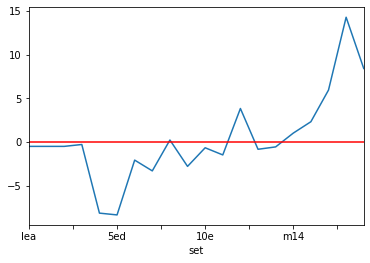

In [146]:
sets["effectiveness"].plot.line(figsize = ())
plt.axhline(0, color = "red")

In [ ]:
# writes the df as a csv
#sets.to_csv("sets_summary.csv")